# Support Vector Machine - Fraud in Wine Project

Wine fraud relates to the commercial aspects of wine. The most prevalent type of fraud is one where wines are adulterated, usually with the addition of cheaper products (e.g. juices) and sometimes with harmful chemicals and sweeteners (compensating for color or flavor).

Counterfeiting and the relabelling of inferior and cheaper wines to more expensive brands is another common type of wine fraud.

Data Source: P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis. Modeling wine preferences by data mining from physicochemical properties. In Decision Support Systems, Elsevier, 47(4):547-553, 2009.

## Project Goals

Create a machine learning model that can help detect low quality (a.k.a "fraud") wine samples.

***
## 1. Exploratory Data Analysis and Visualization

### Importing necessary libraries.

In [125]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Reading the data.

In [126]:
df = pd.read_csv("wine_fraud.csv")

### Head of DataFrame.

In [127]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Legit,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,Legit,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,Legit,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,Legit,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Legit,red


### Unique values that we will predict in quality column.

In [128]:
df.quality.unique()

array(['Legit', 'Fraud'], dtype=object)

### Countplot that displays the count per category of Legit vs Fraud.

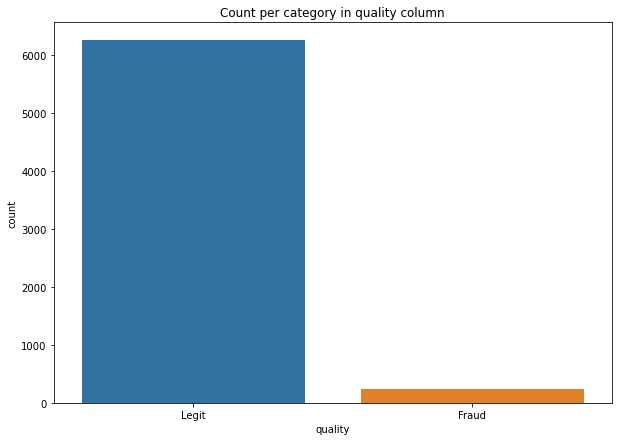

In [129]:
plt.figure(figsize=(10,7))
sns.countplot(x='quality', data=df)
plt.title("Count per category in quality column");

We can see that target is unbalaned and there is much more legit wines.

### Difference between red and white wine when it comes to fraud.

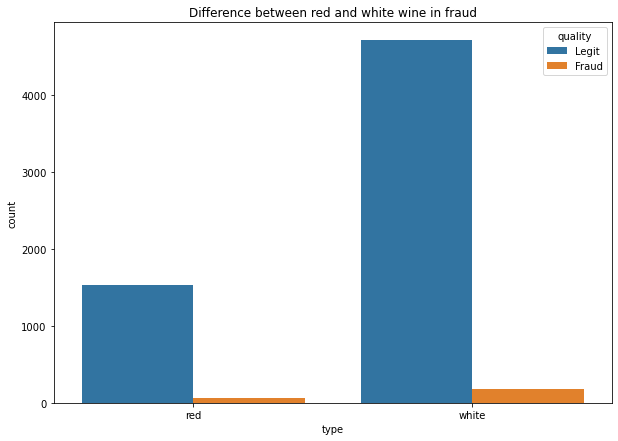

In [130]:
plt.figure(figsize=(10,7))
sns.countplot(x='type', data=df, hue='quality')
plt.title("Difference between red and white wine in fraud");

### Percentage of red and white wines that are fraud.

Red Wines

In [131]:
num_all_red = df[df.type == 'red']['type'].count()
num_fraud_red = df[(df.type == 'red') & (df.quality == 'Fraud')]['type'].count()
num_fraud_red / num_all_red * 100

3.9399624765478425

White Wines

In [132]:
num_all_white = df[df.type == 'white']['type'].count()
num_fraud_white = df[(df.type == 'white') & (df.quality == 'Fraud')]['type'].count()
num_fraud_white / num_all_white * 100

3.7362188648427925

Almost 4 percent of wines from each category are Fraud.

### Value Mapping to:
- Legit: 0
- Fraud: 1

In [133]:
df.quality = df.quality.map({'Legit':0, 'Fraud':1})

### Calculating correlation between quality and rest.

In [134]:
df.corr().quality

fixed acidity           0.021794
volatile acidity        0.151228
citric acid            -0.061789
residual sugar         -0.048756
chlorides               0.034499
free sulfur dioxide    -0.085204
total sulfur dioxide   -0.035252
density                 0.016351
pH                      0.020107
sulphates              -0.034046
alcohol                -0.051141
quality                 1.000000
Name: quality, dtype: float64

### Barplot with correlations.

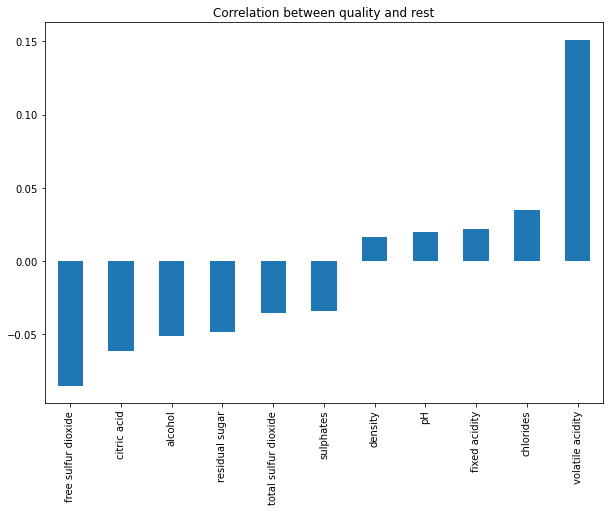

In [135]:
plt.figure(figsize=(10,7))
df.corr()['quality'][:-1].sort_values().plot(kind='bar')
plt.title("Correlation between quality and rest");

### Clustermap with relationships between variables.

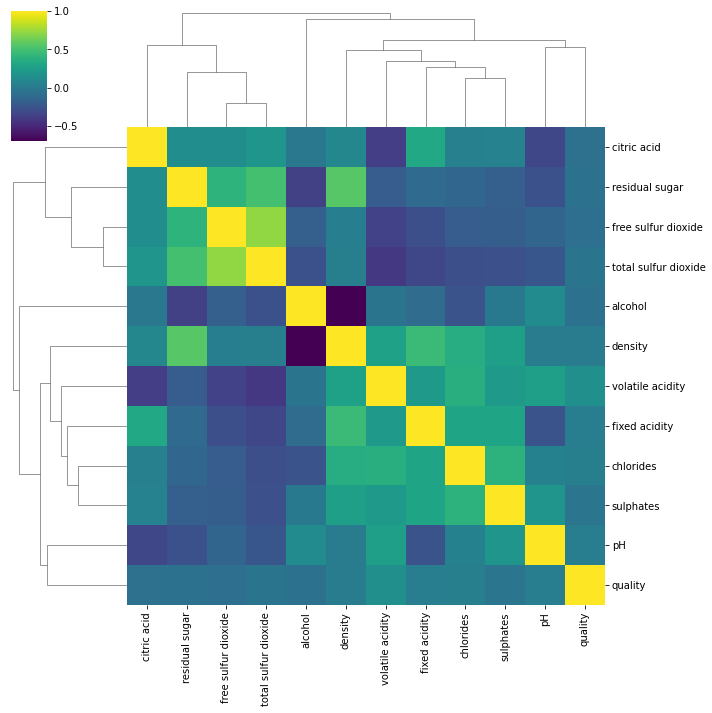

In [136]:
sns.clustermap(df.corr(),cmap='viridis');

***
## 2. Creating Machine Learning Model

### Converting column "type" from a string "red" or "white" to dummy variabes.

In [137]:
df['type'] = pd.get_dummies(df['type'],drop_first=True)

In [138]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0,0


### Separating out the data into X features and y target label.

In [139]:
X = df.drop('quality',axis=1)
y = df['quality']

### Performing Train Test Split on the data, with 10% test size.

In [140]:
from sklearn.model_selection import train_test_split

In [141]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

### Scaling X_train and X_test data for better model performance.

In [142]:
from sklearn.preprocessing import StandardScaler

In [143]:
scaler = StandardScaler()

In [144]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Creating Support Vector Machines classifier.

Classes are unbalanced, in an attempt to help alleviate this issue, we can automatically adjust weights inversely proportional to class frequencies with class_weight argument.

In [145]:
from sklearn.svm import SVC

In [146]:
svc = SVC(class_weight='balanced')

### Using GridSearchCV to find best C and gamma parameters.

In [147]:
from sklearn.model_selection import GridSearchCV

In [148]:
param_grid = {
    'C':[0.001,0.01,0.1,0.5,1],
    'gamma':['scale','auto']}
grid = GridSearchCV(svc,param_grid)

In [149]:
grid.fit(X_train,y_train)

GridSearchCV(estimator=SVC(class_weight='balanced'),
             param_grid={'C': [0.001, 0.01, 0.1, 0.5, 1],
                         'gamma': ['scale', 'auto']})

### Best parameters for our model.

In [150]:
grid.best_params_

{'C': 1, 'gamma': 'auto'}

***
## 3. Model Performance Evaluation

Let's now evaluate your model on the remaining 10% of the data, the test set.

In [151]:
grid_pred = grid.predict(X_test)

In [152]:
from sklearn.metrics import plot_confusion_matrix,classification_report

### Confusion Matrix Plot.

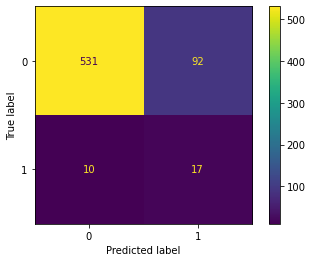

In [153]:
import warnings
warnings.filterwarnings("ignore")
plot_confusion_matrix(grid, X_test, y_test);

### Classification Report.

In [154]:
print(classification_report(y_test,grid_pred))

              precision    recall  f1-score   support

           0       0.98      0.85      0.91       623
           1       0.16      0.63      0.25        27

    accuracy                           0.84       650
   macro avg       0.57      0.74      0.58       650
weighted avg       0.95      0.84      0.88       650



***
## 4. Summary

Thanks to the confusion matrix we can compare true label versus predicted label. For 92 legitimate wines, we thought they were fraudulent and then for 10 fraudulent wines we thought they were legit and we are actually only able to get about 17 of the ones that were actually fraudulent, which might be good because it is imbalanced dataset.

When we take a look at the classification report we can notice that the precision recall for fraudulent wines is actually quire poor and we can see the combination between those and f1-score

To sum up, this is a very difficult problem to perform analysis and actually predict whether wine is fraudulent or legitimate. Main thing behind this is the fact that wines, when it comes down to the acutal chemical properties that is really not the differentiator between the fraudulent wine and legitimate one.